In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

In [2]:
# stock name/start date/end date
stock_name = ['GOOG','YHOO','AAPL','MSFT','AMZN','JPM','BAC','HSBC','CIT','GS']
s_date = '1/1/2007'
e_date = '6/23/2017'
stock_list = pd.DataFrame({'Date':[], 'Open':[],'High':[],'Low':[],'Close':[],
                          'Volume':[],'label':[]})
# load stock data from google and create a dataframe
for i  in stock_name:
    temp = web.DataReader(i,data_source = 'google',start = s_date,end = e_date)
    temp = temp.reset_index(drop = False)
    temp['label']=i
    stock_list = pd.merge(stock_list,temp,how = 'outer')   

In [46]:
# save to csv file
stock_list.to_csv('2007-2017IT&BANK.csv')

In [3]:
# visualization data preparation
stock_data = pd.read_csv('2007-2017IT&BANK.csv')
stock_data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,label
0,0,2007-01-03,232.77,238.09,230.32,233.56,NaN,GOOG
1,1,2007-01-04,234.27,241.73,233.94,241.39,NaN,GOOG
2,2,2007-01-05,241.01,243.51,238.82,243.35,NaN,GOOG
3,3,2007-01-08,243.60,244.69,240.86,241.55,NaN,GOOG
4,4,2007-01-09,242.48,243.88,240.36,242.51,NaN,GOOG


In [454]:
# summary statistics
# for close price
sc = SparkContext.getOrCreate()
def summarystats(stockName):
    temp = stock_data[stock_data['label']==stockName].Close
    mean = temp.mean()
    median = temp.median()
    std = temp.std()
# convert to array in order to RDD
    to_array = np.array(temp, dtype=pd.Series)
    RDD = sc.parallelize(to_array)
# compute skewness
    skew = RDD.map(lambda x:(x-mean)**3)
    skew = (skew.sum())/(std**3)
    length = len(temp)
    skewness = (length/((length-1)*(length-2)))*skew
# compute Kurtosis
    kur = RDD.map(lambda x:(x-mean)**4)
    kur = (kur.sum())/std**4
    kurtosis = ((1/length)*kur)-3
    return mean,median,std,skewness,kurtosis

In [456]:
# could try different names from stock_name
# google stock example
summarystats('GOOG')

(415.8142548350402,
 316.02,
 201.09587513743685,
 0.8146852478608684,
 -0.49176288770191556)

In [4]:
# visual  data preparation
# vsprice:visualization for price trends
vsprice_data = stock_data.Date[0:2637]
stock_name = ['GOOG','YHOO','AAPL','MSFT','AMZN','JPM','BAC','HSBC','CIT','GS']
for i in stock_name:
    temp  = stock_data[stock_data.label==i].Open
    temp.reset_index(drop=True, inplace=True)
    vsprice_data = pd.concat([vsprice_data,temp],axis = 1)

In [5]:
vsprice_data.columns =['Date','GOOG','YHOO','AAPL','MSFT','AMZN','JPM','BAC','HSBC','CIT','GS']

C:\Users\jmx\Anaconda3\lib\site-packages\matplotlib\cbook.py:2644: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


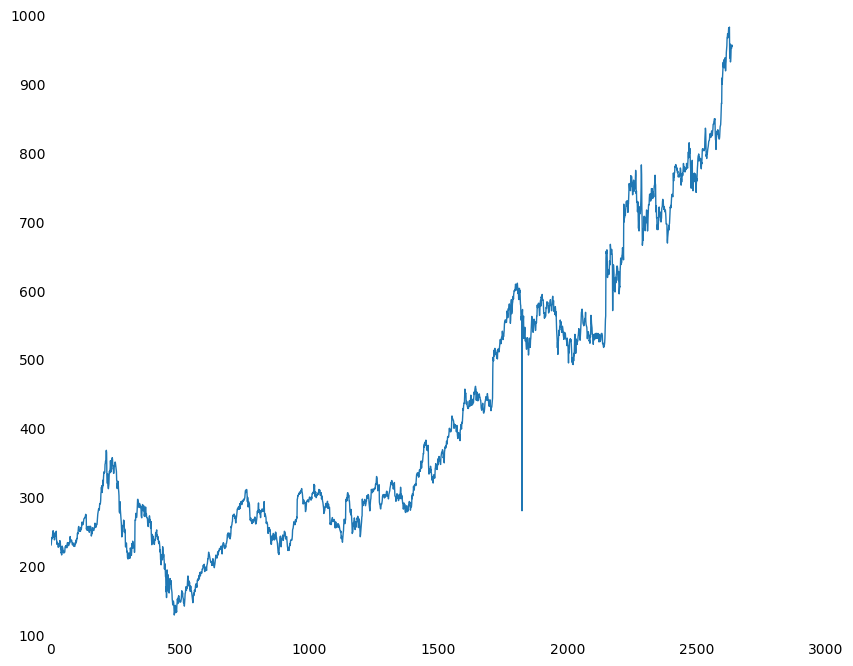

In [15]:
#########################
# visual price one by one

def pricevisual(stockName):
    plt.figure(figsize=(10, 8))    
 
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    
      
  
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    
  
  
    
    
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")     
    

    plt.plot(vsprice_data[stockName].values,    
            lw=2.5, color=(31/255, 119/255, 180/255),linewidth = 1)
    plt.show()

# google stock example
pricevisual('GOOG')

C:\Users\jmx\Anaconda3\lib\site-packages\matplotlib\cbook.py:2644: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


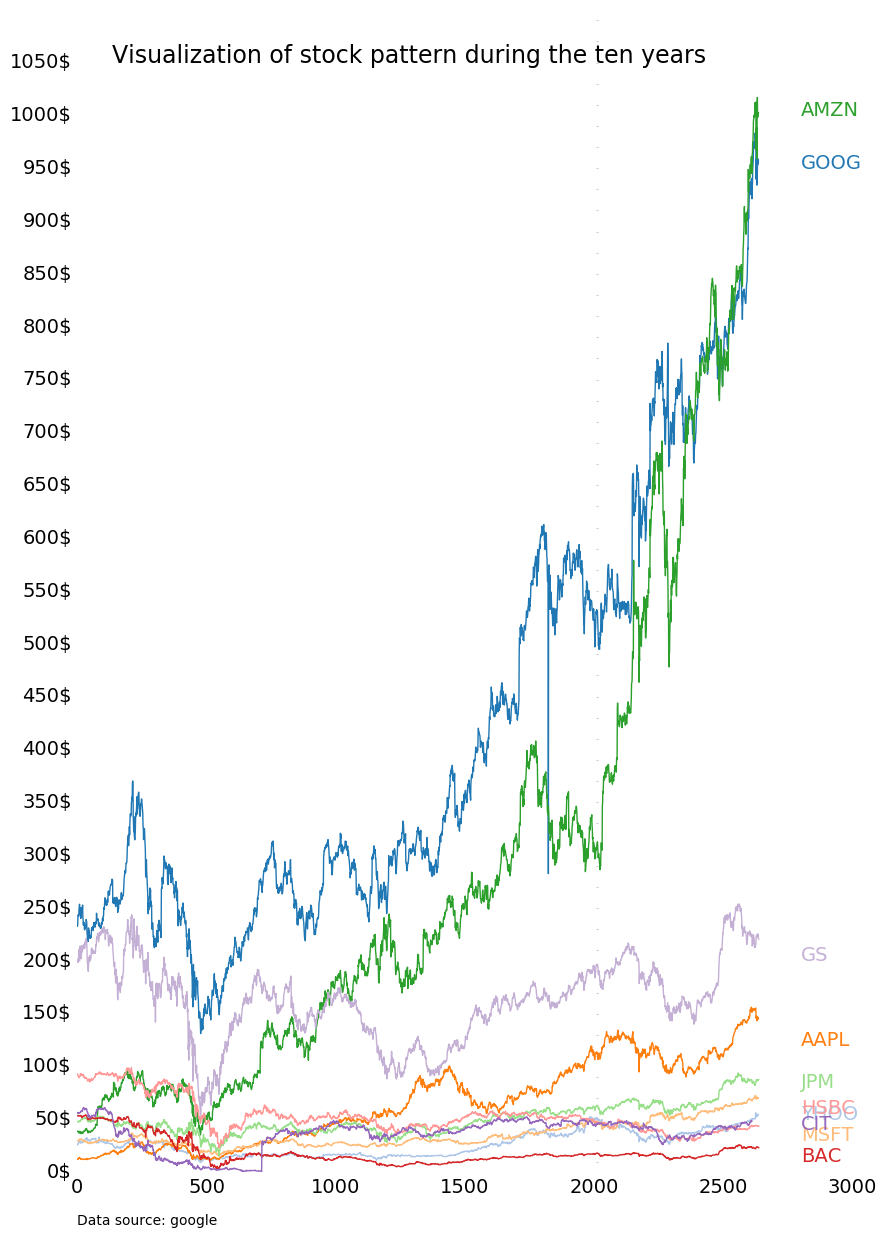

In [13]:
####################################
# visualization for prices in a plot
# visualization for stock prices
# Read the data into a pandas DataFrame.    
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
  
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(10, 15))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 1100)    
  
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(0, 1100, 50), [str(x) + "$" for x in range(0, 1100,50)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(10, 1100, 20):    
    plt.plot(range(2007, 2017), [y] * len(range(2007, 2017)), "--", lw=0.5, color="black", alpha=0.3)    
  
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")     
# Now that the plot is prepared, it's time to actually plot the data!    
# Note that I plotted the majors in order of the highest % in the final year.    
stock_name = ['GOOG','YHOO','AAPL','MSFT','AMZN','JPM','BAC','HSBC','CIT','GS']  
for i, j in enumerate(stock_name):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(vsprice_data[j].values,    
            lw=2.5, color=tableau20[i],linewidth = 1)
    if j == "GOOG":    
        y_pos =950    
    elif j == "YHOO":    
        y_pos = 50    
    elif j == "AAPL":    
        y_pos =120    
    elif j == "MSFT":    
        y_pos =  30 
    elif j == "AMZN":    
        y_pos = 1000    
    elif j == "JPM":    
        y_pos = 80    
    elif j == "BAC":    
        y_pos = 10   
    elif j == "HSBC":    
        y_pos = 55   
    elif j == "CIT":    
        y_pos = 40   
    elif j == "GS":    
        y_pos = 200
         
  
    # Again, make sure that all labels are large enough to be easily read    
    # by the viewer.    
    plt.text(2800, y_pos, j, fontsize=14, color=tableau20[i])

plt.text(1300,1050, "Visualization of stock pattern during the ten years ", fontsize=17, ha="center")    
  
plt.text(0, -50, "Data source: google", fontsize=10)
plt.savefig('price')
plt.show()

In [7]:
###############################
# visualization for volatility

# get close price of all stocks and create a new dataframe
vsvol_data = stock_data.Date[0:2637]
stock_name = ['GOOG','YHOO','AAPL','MSFT','AMZN','JPM','BAC','HSBC','CIT','GS']
for i in stock_name:
    temp  = stock_data[stock_data.label==i].Close
    temp.reset_index(drop=True, inplace=True)
    vsvol_data = pd.concat([vsvol_data,temp],axis = 1)
vsvol_data.columns = ['Date','GOOG','YHOO','AAPL','MSFT','AMZN','JPM','BAC','HSBC','CIT','GS']

In [8]:
# compute volatility
vsv_data = stock_data.Date[0:2638]
stock_name = ['GOOG','YHOO','AAPL','MSFT','AMZN','JPM','BAC','HSBC','CIT','GS']
for i in stock_name:
    temp1 = vsvol_data[i]
    temp2 = vsvol_data[i].shift(1)
    temp = np.log(temp1/temp2)
    vsv_data = pd.concat([vsv_data,temp],axis = 1)

C:\Users\jmx\Anaconda3\lib\site-packages\matplotlib\cbook.py:2644: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


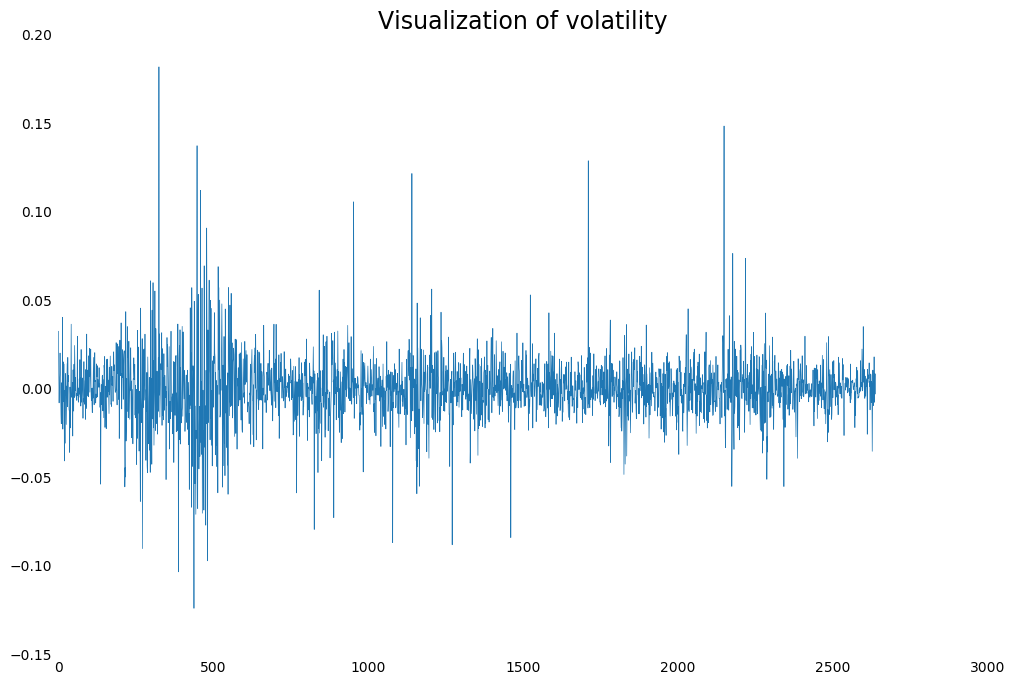

In [11]:
# visual volatility one by one
def vvisual(stockName):
    plt.figure(figsize=(12, 8))    
 
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    
      
  
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    
  
  
    
    
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")     
    

    plt.plot(vsv_data[stockName].values,    
            lw=2.5, color=(31/255, 119/255, 180/255),linewidth = 0.5)
    plt.title ("Visualization of volatility",fontsize=17)
    plt.show()
# google stock example
vvisual('GOOG')

C:\Users\jmx\Anaconda3\lib\site-packages\matplotlib\cbook.py:2644: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


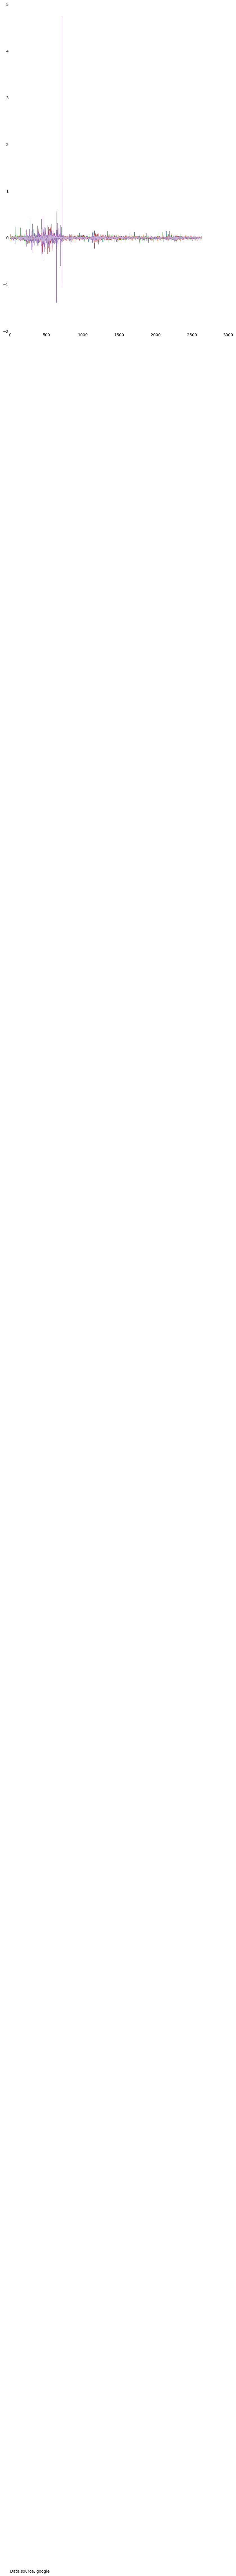

In [18]:
####################################
# visualization for volitility in a plot
# Read the data into a pandas DataFrame.    
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
  
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(10, 15))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
  
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")     
# Now that the plot is prepared, it's time to actually plot the data!    
# Note that I plotted the majors in order of the highest % in the final year.    
stock_name = ['GOOG','YHOO','AAPL','MSFT','AMZN','JPM','BAC','HSBC','CIT','GS']  
for i, j in enumerate(stock_name):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(vsv_data[j].values,    
            lw=2.5, color=tableau20[i],linewidth = 0.5)
  
plt.text(0, -50, "Data source: google", fontsize=10)
plt.show()